In [79]:
# importing required liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import plotly.express as px
import plotly.graph_objects as go
import pickle
%matplotlib inline
# Models Libraries
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [80]:
# Loading datasets 
final = pickle.load(open('final.pickle','rb'))
hist = pickle.load(open('hist.pickle','rb'))

In [81]:
pd.set_option('max_columns', None)

## Feature Engineering 

#### We are going to do some feature engineeringa nd modifications to prepare the data or model evaluation

In [82]:
final.head(1)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv,date_diff,year,month
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025.0,0,359.29,0.095919,0.088347,58.995952,f,831.8,21.09,20.97,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,0,2012-11-07,1460,2016,11


In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   channel_sales             11878 non-null  object        
 3   cons_12m                  16096 non-null  int64         
 4   cons_gas_12m              16096 non-null  int64         
 5   cons_last_month           16096 non-null  int64         
 6   date_activ                16096 non-null  object        
 7   date_end                  16096 non-null  datetime64[ns]
 8   date_modif_prod           16096 non-null  object        
 9   date_renewal              16096 non-null  datetime64[ns]
 10  forecast_cons_12m         16096 non-null  float64       
 11  forecast_cons_year        16096 non-null  float64       
 12  forecast_discount_

#### Preparing the two dataframes for modeling

In [16]:
final.head(1)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv,date_diff,year,month
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025.0,0,359.29,0.095919,0.088347,58.995952,f,831.8,21.09,20.97,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,0,2012-11-07,1460,2016,11


In [83]:
# replacing negative values from final dataframe 
final.loc[final['cons_12m']<0] = np.nan # replacing negative values with nan
final.loc[final['cons_gas_12m']<0] = np.nan
final.loc[final['cons_last_month']<0] = np.nan
final.loc[final['imp_cons']<0] = np.nan
final.loc[final['forecast_cons_12m']<0] = np.nan
final.loc[final['forecast_discount_energy']<0] = np.nan
final.loc[final['forecast_meter_rent_12m']<0] = np.nan

In [84]:
# Adjust skeweness by using log 10 
# since log 10 doesnt apply for zero we will add 1 constant
final['cons_12m'] = np.log10(final['cons_12m']+1)
final['cons_gas_12m'] = np.log10(final['cons_gas_12m']+1)
final['cons_last_month'] = np.log10(final['cons_last_month']+1)
final['imp_cons'] = np.log10(final['imp_cons']+1)
final['forecast_cons_12m'] = np.log10(final['forecast_cons_12m']+1)
final['forecast_discount_energy'] = np.log10(final['forecast_discount_energy']+1)
final['forecast_meter_rent_12m'] = np.log10(final['forecast_meter_rent_12m']+1)

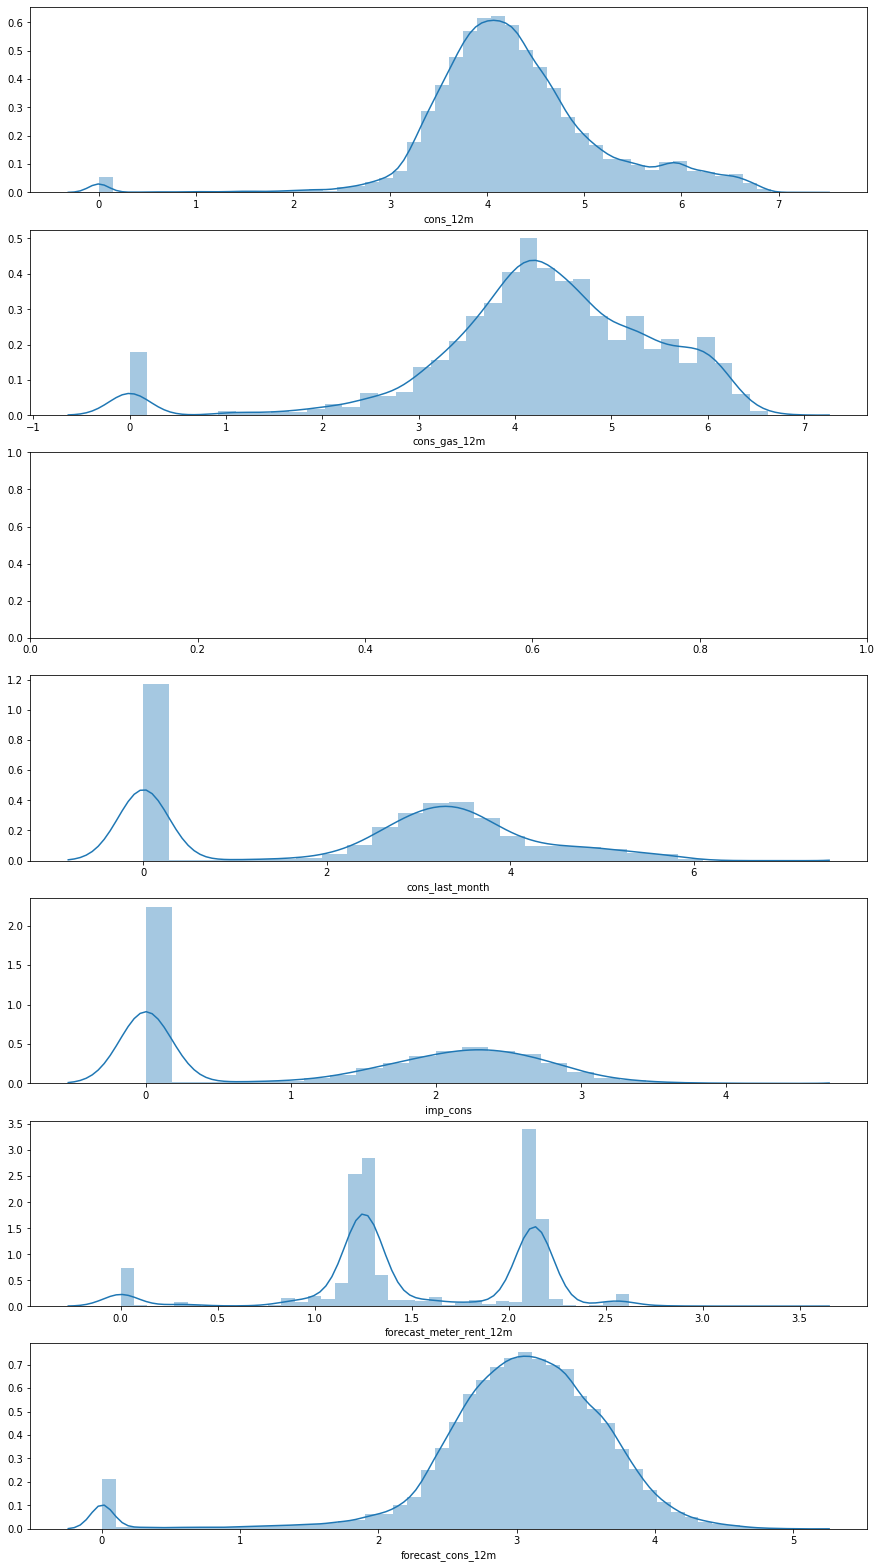

In [85]:
# plotting distributions again to see the difference 
fig, ax = plt.subplots(figsize=(15,28),nrows = 7)
sns.distplot(final['cons_12m'].dropna(),ax=ax[0])
sns.distplot(final[final['has_gas']=='t']['cons_gas_12m'].dropna(),ax=ax[1])
sns.distplot(final['cons_last_month'].dropna(),ax=ax[3])
sns.distplot(final['imp_cons'].dropna(),ax=ax[4])
sns.distplot(final['forecast_meter_rent_12m'].dropna(),ax=ax[5])
sns.distplot(final['forecast_cons_12m'].dropna(),ax=ax[6])

#### Now our consumption columns are near normal distribution

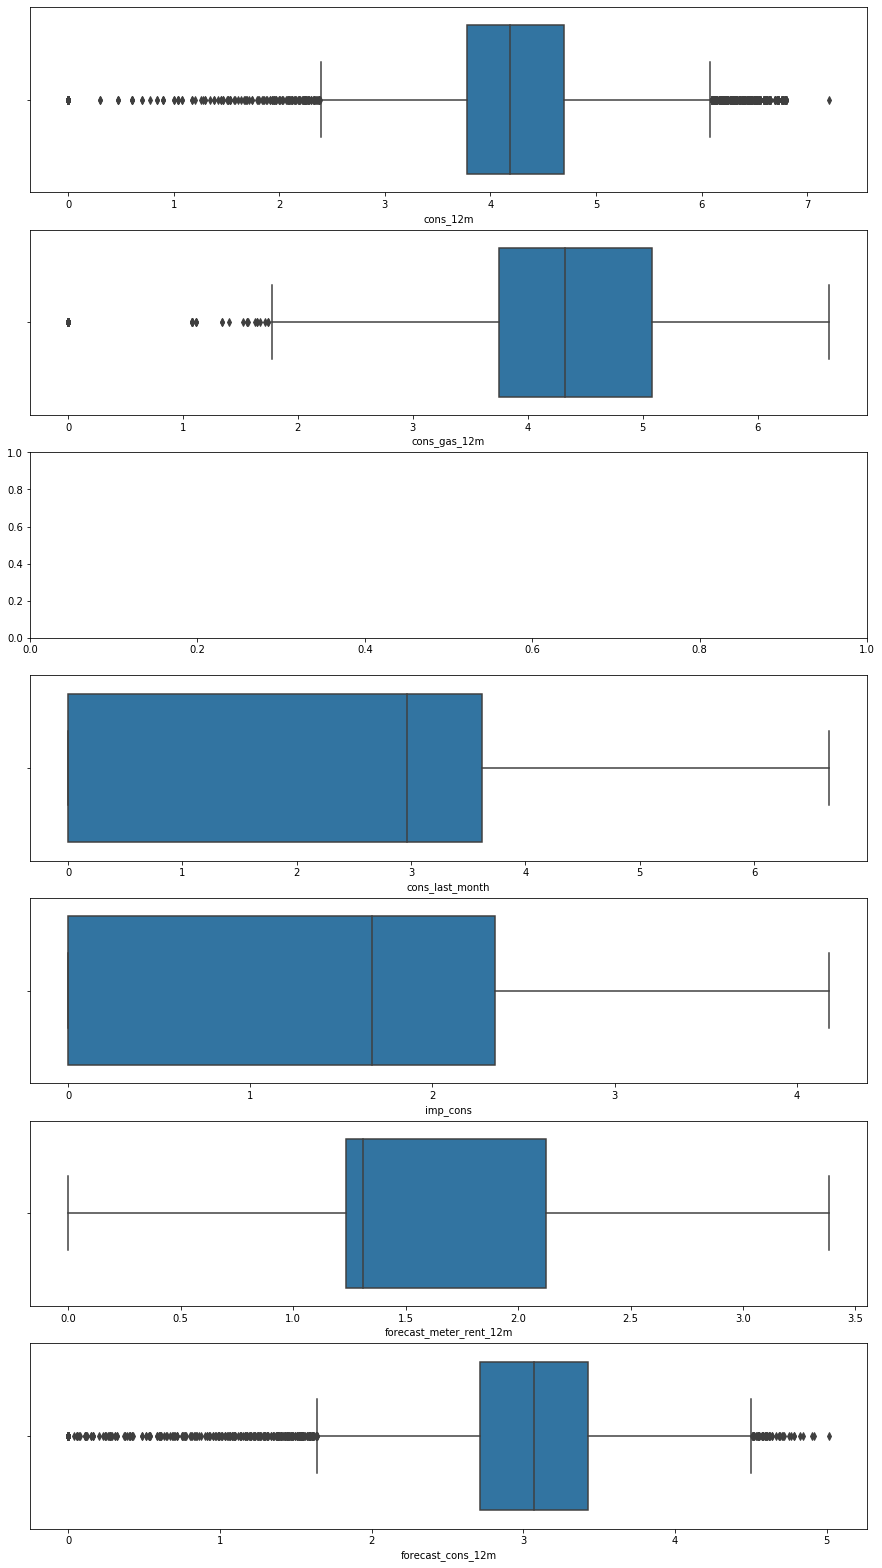

In [86]:
# removing or replacing the outliers
fig, ax = plt.subplots(figsize=(15,28),nrows = 7)
sns.boxplot(final['cons_12m'].dropna(),ax=ax[0])
sns.boxplot(final[final['has_gas']=='t']['cons_gas_12m'].dropna(),ax=ax[1])
sns.boxplot(final['cons_last_month'].dropna(),ax=ax[3])
sns.boxplot(final['imp_cons'].dropna(),ax=ax[4])
sns.boxplot(final['forecast_meter_rent_12m'].dropna(),ax=ax[5])
sns.boxplot(final['forecast_cons_12m'].dropna(),ax=ax[6])

In [87]:
def outlier_iqr(df,col):
    q1 = np.percentile(df[col],25,interpolation='midpoint')
    q3 = np.percentile(df[col],75,interpolation='midpoint')
    iqr = q3 -q1
    upper = df[col] >= (q3 + (iqr*1.5))
    lower = df[col] <= (q1 - (iqr*1.5))
    print('upper boundary'+'',upper)
    print("lower boundary" + '',lower)

In [88]:
# Converting has gas to binary feature (hot encoding)
final['has_gas'] = final['has_gas'].replace({'f':0,'t':1})

### Categorical dummies

In [89]:
final['activity_new']=final['activity_new'].fillna('null_activity')

In [90]:
count_activity = pd.DataFrame({'activity_count':final['activity_new'].value_counts()})


In [91]:
less_samples = list(count_activity[count_activity['activity_count']<=70].index)


In [92]:
final['activity_new'] = final['activity_new'].replace(less_samples ,'null_activity')

In [93]:
final['activity_new']=final['activity_new'].astype('category')

In [94]:
activity = pd.get_dummies(final['activity_new'],prefix='activity')

In [95]:
activity.columns = [col[:18] for col in activity.columns]
activity.head()

,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [97]:
# Channel Sales Category 
final['channel_sales']=final['channel_sales'].fillna('null_channel')

In [98]:
final['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7342
null_channel                        4265
lmkebamcaaclubfxadlmueccxoimlema    2067
usilxuppasemubllopkaafesmlibmsdf    1441
ewpakwlliwisiwduibdlfmalxowmwpci     963
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [99]:
channel = pd.get_dummies(final['channel_sales'],prefix='channel')

In [100]:
channel.columns = [col[:10] for col in channel.columns]
channel.head()

,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_nu,channel_sd,channel_us
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [101]:
channel.drop(columns=['channel_nu'],inplace=True)

In [102]:
# origin up 
final['origin_up']=final['origin_up'].fillna('null_origin')

In [103]:
origin = pd.get_dummies(final['origin_up'],prefix='origin')

In [104]:
origin.columns = [col[:10] for col in origin.columns]
origin.head()

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [105]:
origin.drop(columns = ['origin_nul'],inplace = True )

In [106]:
# merging these categories dummies to the main dataframe 
final = pd.merge(final,activity,right_index=True,left_index=True)
final = pd.merge(final,channel,right_index=True,left_index=True)
final = pd.merge(final,origin,right_index=True,left_index=True)

In [107]:
final.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv,date_diff,year,month,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
0,48ada52261e7cf58715202705a0451c9,null_activity,lmkebamcaaclubfxadlmueccxoimlema,5.490346,0.000000,4.001128,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,21.09,20.97,1.0,1732.36,3.0,ldkssxwpmemidmecebumciepifcamkci,180.000,0.0,2012-11-07,1460.0,2016.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,null_activity,foosdfpfkusacimwkcsosbicdxkicaua,0.000000,4.739944,0.000000,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2013-06-15,1096.0,2016.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,d29c2c54acc38ff3c0614d0a653813dd,null_activity,null_channel,3.668479,0.000000,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,16.38,1.0,18.89,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0,2009-08-21,2566.0,2016.0,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,null_activity,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.000000,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,28.60,1.0,6.60,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0,2010-04-16,2192.0,2016.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,bba03439a292a1e166f80264c16191cb,null_activity,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.000000,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,30.22,1.0,25.46,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0,2010-03-30,2192.0,2016.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [108]:
final.drop(columns=['activity_new','channel_sales','origin_up'],inplace=True)

In [109]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16018 non-null  object        
 1   cons_12m                  16018 non-null  float64       
 2   cons_gas_12m              16018 non-null  float64       
 3   cons_last_month           16018 non-null  float64       
 4   date_activ                16018 non-null  object        
 5   date_end                  16018 non-null  datetime64[ns]
 6   date_modif_prod           16018 non-null  object        
 7   date_renewal              16018 non-null  datetime64[ns]
 8   forecast_cons_12m         16018 non-null  float64       
 9   forecast_cons_year        16018 non-null  float64       
 10  forecast_discount_energy  16018 non-null  float64       
 11  forecast_meter_rent_12m   16018 non-null  float64       
 12  forecast_price_ene

In [110]:
final_corr = final.corr()

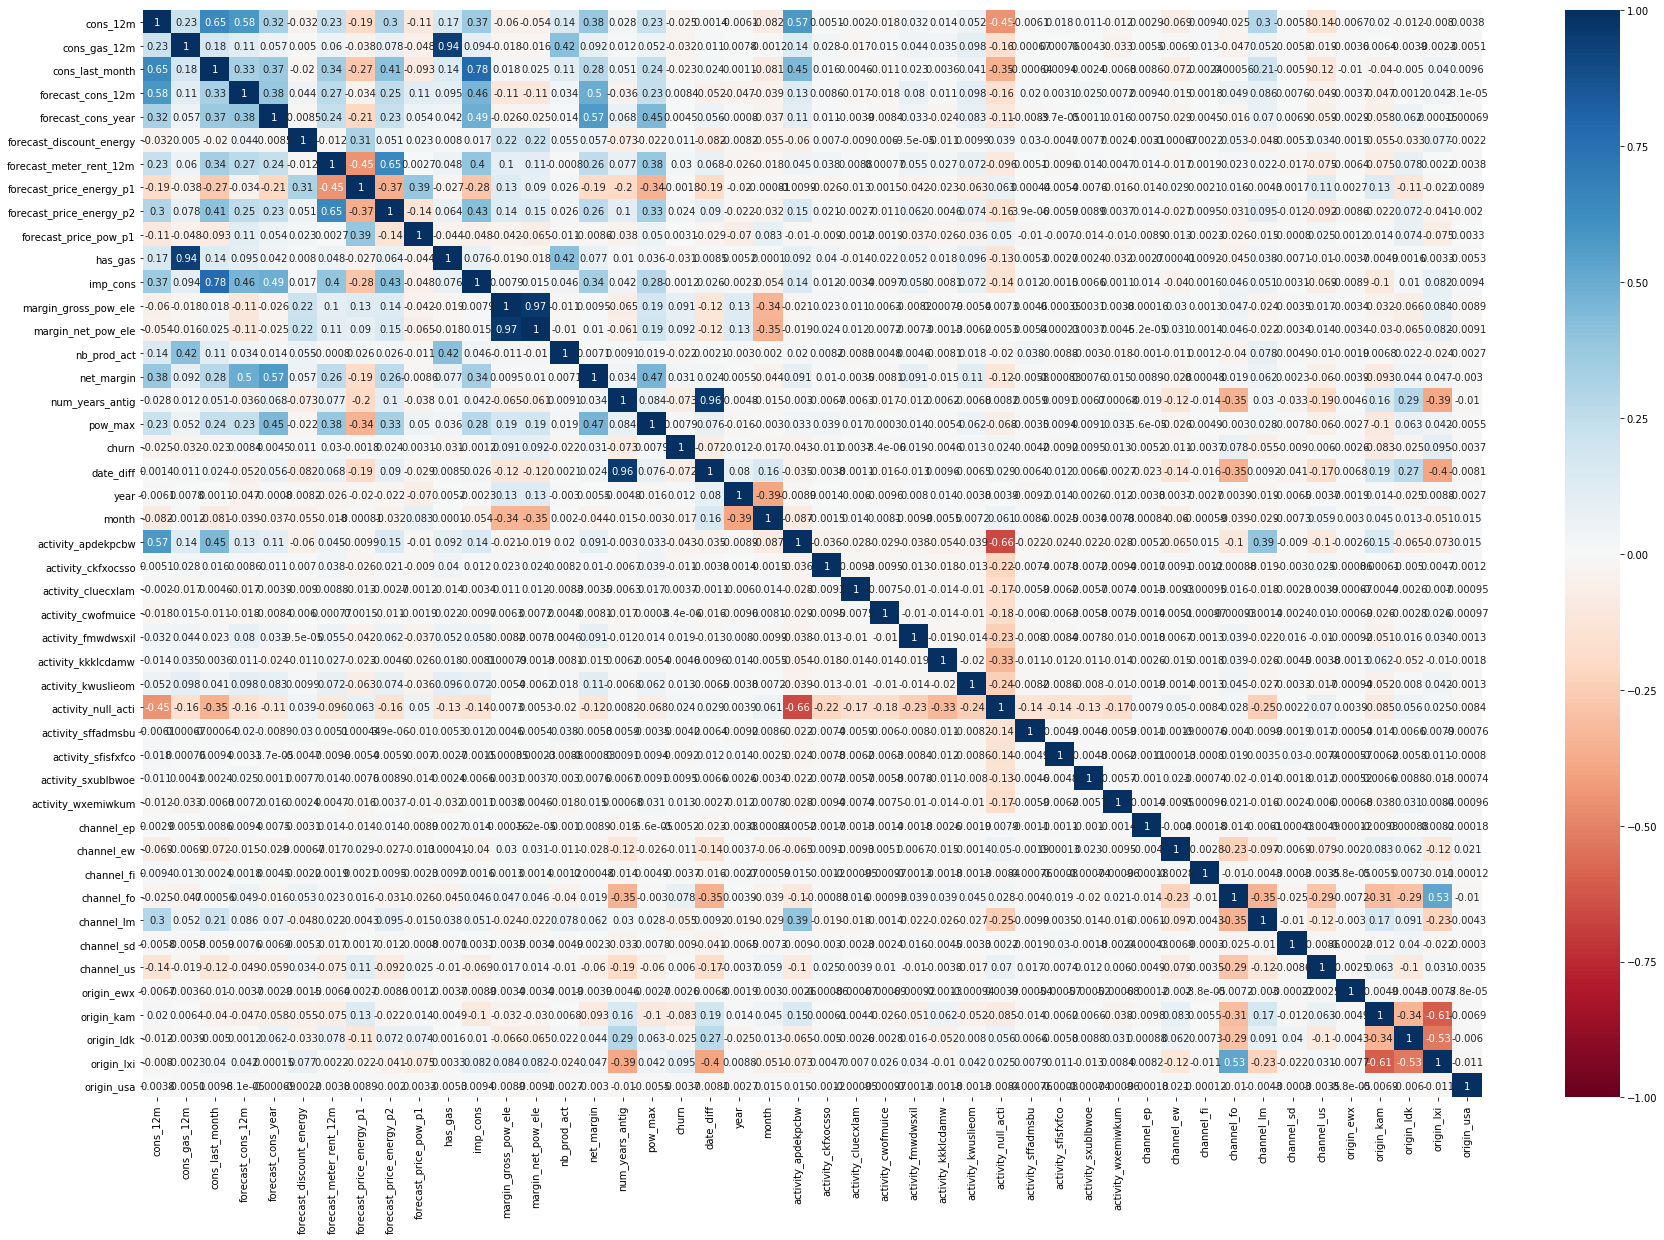

In [111]:
# Features Correlation 
plt.figure(figsize=(30,20))
sns.heatmap(final_corr,annot=True,vmin=-1,vmax=1,cmap='RdBu');

#### We are going to remove highely corelated features to avoid multilinearity

In [112]:
final.drop(columns=['cons_last_month','num_years_antig'],inplace=True)
final.drop(columns=['margin_gross_pow_ele'],inplace=True)

##### history dataset

In [113]:
hist.head(2)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,years,month
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2015,1
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2015,2


In [114]:
hist.drop(columns=['years'],inplace = True)
hist.drop(columns=['month'],inplace = True)

In [115]:
mean_2015 = hist.groupby(['id']).mean()
mean_2015

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [116]:
mean_2015 = mean_2015.rename(columns={'price_p1_var':'mean_price_p1_var',
                                     'price_p2_var':'mean_price_p2_var',
                                     'price_p3_var':'mean_price_p3_var',
                                     'price_p1_fix':'mean_price_p1_fix',
                                     'price_p2_fix':'mean_price_p2_fix',
                                     'price_p3_fix':'mean_price_p3_fix'})
mean_2015['mean_price_p1'] = mean_2015['mean_price_p1_var'] + mean_2015['mean_price_p1_fix']
mean_2015['mean_price_p2'] = mean_2015['mean_price_p2_var'] + mean_2015['mean_price_p2_fix']
mean_2015['mean_price_p3'] = mean_2015['mean_price_p3_var'] + mean_2015['mean_price_p3_fix']

In [117]:
mean_2015

,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3
id,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411


In [118]:
hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [119]:
mean_6m=hist[hist['price_date']>= '2015-06-01'].groupby(['id']).mean().reset_index()
mean_6m.head()

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.122238,0.102864,0.073734,40.728885,24.437330,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.145218,0.000000,0.000000,44.444710,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202555,0.000000,0.000000,45.944710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.115665,0.096712,0.069308,40.705612,24.423365,16.282245
4,00114d74e963e47177db89bc70108537,0.146715,0.000000,0.000000,44.266930,0.000000,0.000000


In [120]:
mean_6m = mean_6m.rename(columns={'price_p1_var':'mean_price_p1_var_6m',
                                     'price_p2_var':'mean_price_p2_var_6m',
                                     'price_p3_var':'mean_price_p3_var_6m',
                                     'price_p1_fix':'mean_price_p1_fix_6m',
                                     'price_p2_fix':'mean_price_p2_fix_6m',
                                     'price_p3_fix':'mean_price_p3_fix_6m'})
mean_6m['mean_price_p1_6m'] = mean_6m['mean_price_p1_var_6m'] + mean_6m['mean_price_p1_fix_6m']
mean_6m['mean_price_p2_6m'] = mean_6m['mean_price_p2_var_6m'] + mean_6m['mean_price_p2_fix_6m']
mean_6m['mean_price_p3_6m'] = mean_6m['mean_price_p3_var_6m'] + mean_6m['mean_price_p3_fix_6m']

In [121]:
# merging the two dataframes 
features = pd.merge(mean_2015,mean_6m,on='id')

In [122]:
final.head(2)

,id,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_actv,date_diff,year,month,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,2012-11-07,1460.0,2016.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,2013-06-15,1096.0,2016.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [57]:
features.head(2)

,id,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.122238,0.102864,0.073734,40.728885,24.43733,16.291555,40.851123,24.540194,16.365289
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.145218,0.000000,0.000000,44.444710,0.00000,0.000000,44.589928,0.000000,0.000000


In [123]:
final = pd.merge(final,features,on='id')

In [124]:
final

,id,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_actv,date_diff,year,month,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,2012-11-07,1460.0,2016.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.101596,0.091144,0.067143,58.970593,36.365574,8.339044,59.072188,36.456718,8.406188
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,2013-06-15,1096.0,2016.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123938,0.098860,0.062955,41.211047,20.932318,13.954880,41.334985,21.031178,14.017835
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,1.0,18.89,13.800,0.0,2009-08-21,2566.0,2016.0,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.148353,0.012212,0.000000,44.343121,0.000000,0.000000,44.491475,0.012212,0.000000
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,1.0,6.60,13.856,0.0,2010-04-16,2192.0,2016.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.169120,0.088624,0.000000,44.444710,0.000000,0.000000,44.613830,0.088624,0.000000
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,1.0,25.46,13.200,0.0,2010-03-30,2192.0,2016.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149861,0.000000,0.000000,44.444710,0.000000,0.000000,44.594571,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16013,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,2012-05-24,2016-05-08,2015-05-08,2014-05-26,3.667360,0.0,0.0,1.291591,0.138305,0.000000,44.311378,1.0,0.000000,27.88,2.0,381.77,15.000,0.0,2012-05-24,1445.0,2016.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,44.514760,0.000000,0.000000,0.141447,0.000000,0.000000,44.444710,0.000000,0.000000,44.586157,0.000000,0.000000
16014,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2012-08-27,2016-08

In [125]:
features_corr = features.corr()

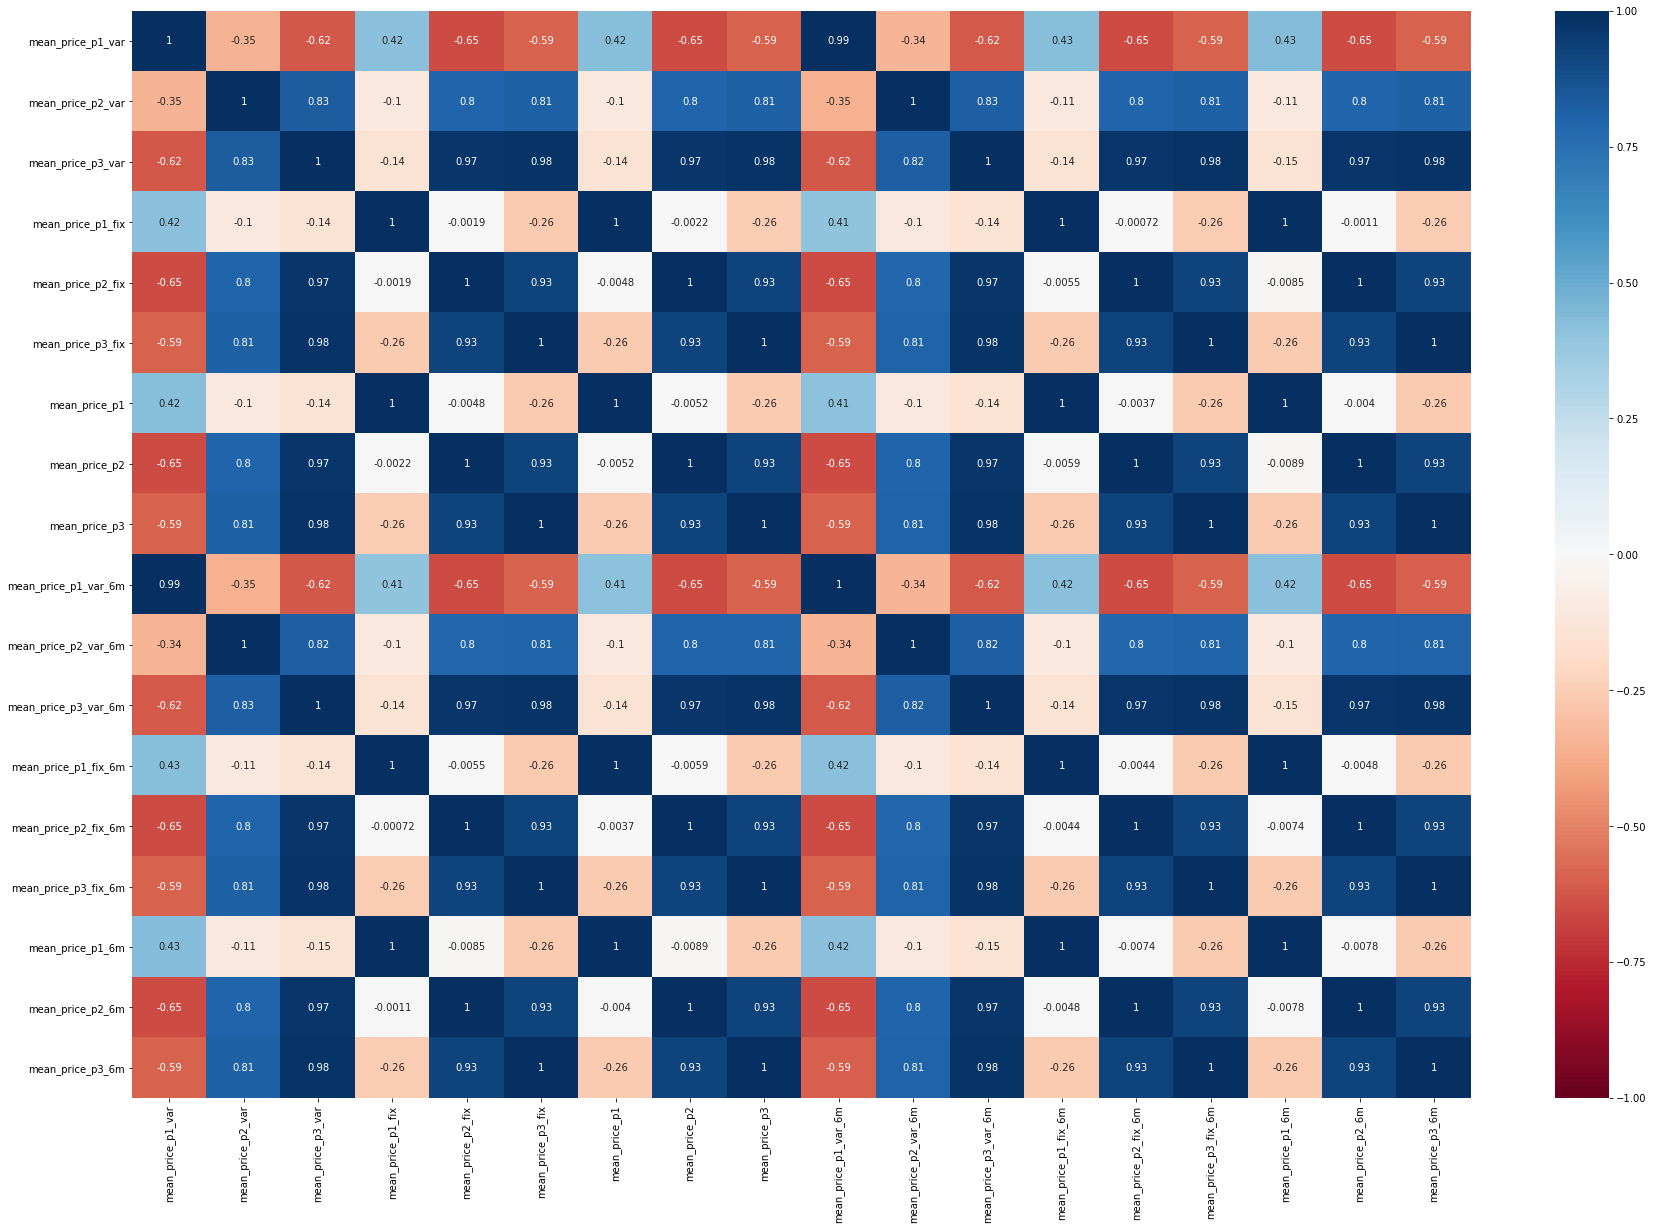

In [126]:
plt.figure(figsize=(30,20))
sns.heatmap(features_corr,annot=True,vmin=-1,vmax=1,cmap='RdBu');

In [127]:
# Saving our dataset for the next use 
pickle.dump(features,open('features.pickle','wb'))
pickle.dump(final,open('final.pickle','wb'))
pickle.dump(hist,open('hist.pickle','wb'))